# Shooting method for BVP

Consider the BVP

$$
y'' = -y + \frac{2 (y')^2}{y}, \qquad -1 < x < +1
$$
with boundary conditions
$$
y(-1) = y(+1) = (e + e^{-1})^{-1}
$$
The exact solution is
$$
y(x) = (e^x + e^{-x})^{-1}
$$

## Formulate as an initial value problem

$$
y'' = -y + \frac{2 (y')^2}{y}, \qquad -1 < x < +1
$$
with initial conditions
$$
y(-1) = (e + e^{-1})^{-1}, \qquad y'(-1) = s
$$
Let the solution of this IVP be denoted as $y(x;s)$. We have to determine $s$ so that
$$
\phi(s) = y(1;s) - (e + e^{-1})^{-1} = 0
$$

## Newton method

To find the root of $\phi(s)$, we use Newton method with an initial guess $s_0$. Then the Newton method updates the guess by
$$
s_{m+1} = s_m - \frac{\phi(s_m)}{\frac{d}{ds}\phi(s_m)}, \qquad m=0,1,2,\ldots
$$
Define
$$
z_s(x) = \frac{\partial}{\partial s} y(x;s)
$$
Then
$$
z_s'(x) = \frac{\partial}{\partial s} y'(x;s)
$$
The derivative of $\phi(s)$ is given by
$$
\frac{d}{ds}\phi(s) = \frac{\partial}{\partial s} y(1;s) = z_s(1)
$$
We can write an equation for $z_s(x)$
$$
z_s'' = \left[ -1 - 2 \left( \frac{y'}{y} \right)^2 \right] z_s + 4 \frac{y'}{y} z_s'
$$
with initial conditions
$$
z_s(-1) = 0, \qquad z_s'(-1) = 1
$$

## First order ODE system

Define the vector
$$
u = \begin{bmatrix}
u_1 \\ u_2 \\ u_3 \\ u_4 \end{bmatrix} = \begin{bmatrix}
y \\ y' \\ z_s \\ z_s' \end{bmatrix}
$$
Then
$$
u_1' = u_2, \qquad u_2' = -u_1 + \frac{2 u_2^2}{u_1}, \qquad u_3' = u_4, \qquad u_4' = \left[ -1 - 2 \left( \frac{u_2}{u_1} \right)^2 \right] u_3 + 4 \frac{u_2}{u_1} u_4
$$
Hence we get the first order ODE system
$$
u' = f(u) = \begin{bmatrix}
u_2 \\
-u_1 + \frac{2 u_2^2}{u_1} \\
u_4 \\
\left[ -1 - 2 \left( \frac{u_2}{u_1} \right)^2 \right] u_3 + 4 \frac{u_2}{u_1} u_4
\end{bmatrix}
$$
with initial condition
$$
u(-1) = \begin{bmatrix}
(e+e^{-1})^{-1} \\
s \\
0 \\
1
\end{bmatrix}
$$
Once we solve this IVP, we get
$$
\phi(s) = u_1(1) - (e + e^{-1})^{-1}, \qquad \frac{d}{ds}\phi(s) = z_s(1) = u_3(1)
$$

## Now we start coding

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

We now code the problem specific data.

In [7]:
def f(u):
    rhs = np.zeros(4)
    rhs[0] = u[1]
    rhs[1] = -u[0] + 2.0*u[1]**2/u[0]
    rhs[2] = u[3]
    rhs[3] = (-1.0-2.0*(u[1]/u[0])**2)*u[2] + 4.0*u[1]*u[3]/u[0]
    return rhs

def initialcondition(s):
    u = np.zeros(4)
    u[0] = 1.0/(np.exp(1)+np.exp(-1))
    u[1] = s
    u[2] = 0.0
    u[3] = 1.0
    return u

def yexact(x):
    return 1.0/(np.exp(x) + np.exp(-x))

The function below implements the two step RK scheme.

In [8]:
def solvephi(n,s):
    h = 2.0/n
    u = np.zeros((n+1,4))
    u[0] = initialcondition(s)
    for i in range(1,n+1):
        u1 = u[i-1] + 0.5*h*f(u[i-1])
        u[i] = u[i-1] + h*f(u1)
    phi = u[n][0] - 1.0/(np.exp(1)+np.exp(-1))
    dphi= u[n][2]
    return phi,dphi,u

Let us see the solution corresponding to the initial guess.

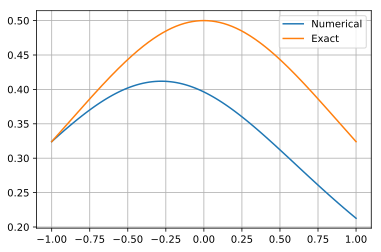

In [9]:
n = 100
s = 0.2
p, dp, u = solvephi(n,s)
x = np.linspace(-1.0,1.0,n+1)
xe = np.linspace(-1.0,1.0,1000)
ye = yexact(xe)
plt.plot(x,u[:,0],xe,ye)
plt.grid(True)
plt.legend(("Numerical","Exact"));

The initial guess is far from the solution. We will not start the shooting method.

    1     2.712498e-01     1.113544e-01
    2     2.534755e-01     1.223885e-01
    3     2.472677e-01     2.633095e-02
    4     2.467661e-01     1.840413e-03
    5     2.467633e-01     1.033511e-05
Root s = 2.467633e-01
phi(s) = 3.296041e-10


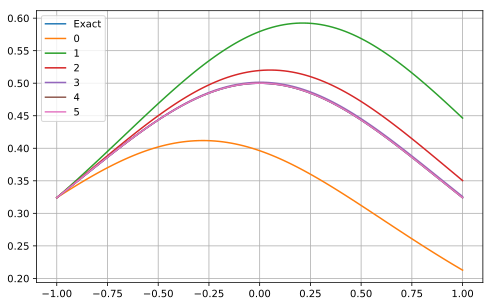

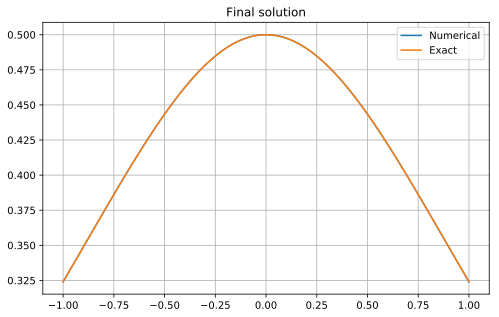

In [10]:
n = 100
s = 0.2
maxiter = 100
TOL = 1.0e-8
it = 0
x  = np.linspace(-1.0,1.0,n+1)
plt.figure(figsize=(8,5))
plt.plot(xe,ye)
leg = ['Exact']
while it < maxiter:
    p, dp, u = solvephi(n,s)
    plt.plot(x,u[:,0])
    leg.append(str(it))
    if np.abs(p) < TOL:
        break
    s = s - p/dp
    it += 1
    print('%5d %16.6e %16.6e'%(it,s,np.abs(p)))
plt.legend(leg); plt.grid(True)
print("Root s = %e" % s)
print("phi(s) = %e" % p)
plt.figure(figsize=(8,5))
plt.plot(x,u[:,0],xe,ye)
plt.grid(True)
plt.title('Final solution')
plt.legend(("Numerical","Exact"));